In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Intensity thresholding and Fill all holes

In [2]:
def thresholding_and_fill_all_holes(gray_img):
    _, binary_img = cv2.threshold(gray_img, 240, 255, cv2.THRESH_BINARY)
    
    seed = np.zeros_like(binary_img)
    seed[0,:] = binary_img[0,:]
    seed[-1,:] = binary_img[-1,:]
    seed[:,0] = binary_img[:,0]
    seed[:,-1] = binary_img[:,-1]

    kernel = np.ones((3, 3), np.uint8)

    while True:
        dilated_seed = cv2.dilate(seed, kernel)
        new_seed = cv2.bitwise_and(dilated_seed, binary_img)

        if np.array_equal(seed, new_seed):
            break
        seed = new_seed
        
    return cv2.bitwise_not(seed)

### Identify and count the separate regions

In [3]:
def identify_regions(binary_img, original_img):
    apple_num = 0
    banana_num = 0
    mandarin_num = 0
    
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_img, connectivity=8)

    for i in range(1, num_labels):
        area = stats[i, cv2.CC_STAT_AREA]

        mask = (labels == i)
        region_pixels = original_img[mask]
        mean_color = np.mean(region_pixels, axis=0).astype(int)

        R_value = mean_color[0]
        G_value = mean_color[1]
        B_value = mean_color[2]

        if area < 6000:
            mandarin_num += 1
        else:
            if R_value > 200:
                banana_num += 1
            else:
                apple_num += 1

    return apple_num, banana_num, mandarin_num       

### Counting fruits

In [4]:
def fruit_counting(img_path, N):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    original_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    binary_img = thresholding_and_fill_all_holes(gray_img)

    apple_num, banana_num, mandarin_num = identify_regions(binary_img, original_img)

    plt.figure(figsize=(5,5))
    plt.imshow(original_img)
    plt.axis('off')
    plt.show()
    print(f'Apples = {apple_num}, Bananas = {banana_num}, Mandarins = {mandarin_num}')
    if apple_num == N and banana_num == N and mandarin_num == N:
        print('All good')
        
    if apple_num < N:
        print(f'Add {N-apple_num} apples')
    elif apple_num > N:
        print(f'Remove {apple_num-N} apples')
        
    if banana_num < N:
        print(f'Add {N-banana_num} bananas')
    elif banana_num > N:
        print(f'Remove {banana_num-N} bananas')
        
    if mandarin_num < N:
        print(f'Add {N-mandarin_num} mandarins')
    elif mandarin_num > N:
        print(f'Remove {mandarin_num-N} mandarins')
    print('\n')

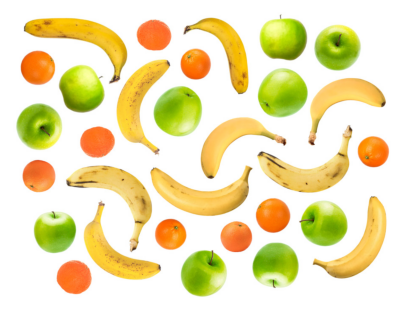

Apples = 10, Bananas = 10, Mandarins = 10
All good




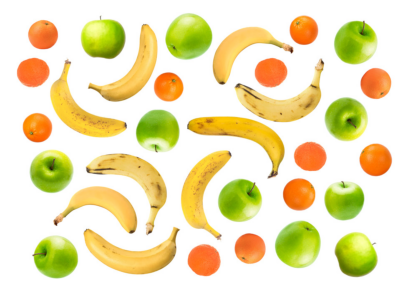

Apples = 11, Bananas = 9, Mandarins = 12
Remove 1 apples
Add 1 bananas
Remove 2 mandarins




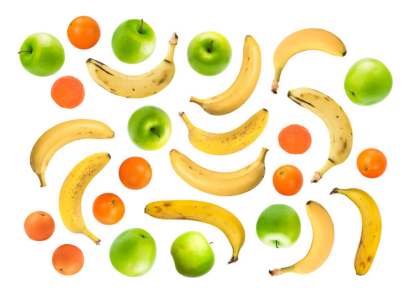

Apples = 8, Bananas = 11, Mandarins = 9
Add 2 apples
Remove 1 bananas
Add 1 mandarins




In [6]:
img_dir = 'COMP9517_25T3_Lab4_Images/'
img_names = ['Fruits1.jpg', 'Fruits2.jpg', 'Fruits3.jpg']
N = 10
for i in range(len(img_names)):
    fruit_counting(img_dir + img_names[i], N)